In [2]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn

       p1   p2        p3  p4  mu  nu  a  b        Dr    Dr_err        Di  \
1506  0.0  0.0  0.951998   0   1   3  1  0  0.000439  0.000843  0.002152   
1558  0.0  0.0  0.951998   0   3   1  0  1  0.000439  0.000843 -0.002152   

        Di_err  
1506  0.000818  
1558  0.000818  


<Axes: xlabel='x', ylabel='y'>

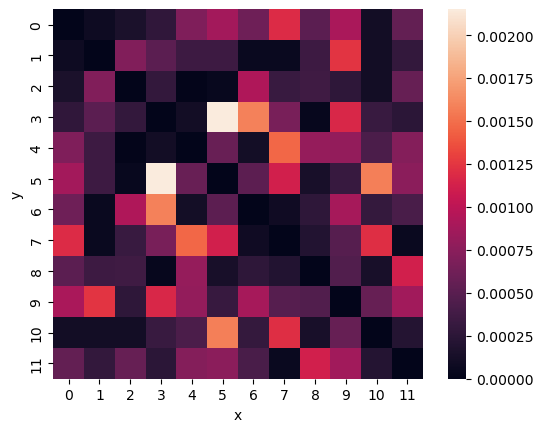

In [3]:
df = pd.read_csv('../../result/gluon_propagator/su2/gluodynamics/66^3x8/beta2.701/original/gluon_propagator.csv')
momenta = df['p1'].unique()
df = df[(df['p1'] == 0) & (df['p2'] == 0) & (df['p3'] == momenta[10]) & (df['p4'] == 0)]
# print(df)
print(df[abs(df['Di']) == abs(df['Di'].max())])
df['x'] = df['mu'] + df['a'] * 4
df['y'] = df['nu'] + df['b'] * 4
df['ratio'] = abs(df['Di'])
# df['ratio'] = df['Di']/ df['Di_err']
df = df.pivot(columns='x', index='y', values='ratio')
seaborn.heatmap(df, square=True, annot=False)

               p1        p2        p3  p4  mu  nu  a  b        Dr    Dr_err  \
8        0.000000  0.000000  0.000000   0   0   0  2  2  2.927348  0.092253   
17       0.000000  0.000000  0.000000   0   0   1  2  2  0.013451  0.070277   
26       0.000000  0.000000  0.000000   0   0   2  2  2  0.021891  0.069343   
35       0.000000  0.000000  0.000000   0   0   3  2  2  0.044244  0.073619   
152      0.000000  0.000000  0.095200   0   0   0  2  2  2.271721  0.038031   
...           ...       ...       ...  ..  ..  .. .. ..       ...       ...   
1027907  3.046393  3.141593  3.141593   0   0   3  2  2  0.000007  0.000045   
1028024  3.141593  3.141593  3.141593   0   0   0  2  2  0.003616  0.000124   
1028033  3.141593  3.141593  3.141593   0   0   1  2  2 -0.001810  0.000098   
1028042  3.141593  3.141593  3.141593   0   0   2  2  2 -0.001805  0.000096   
1028051  3.141593  3.141593  3.141593   0   0   3  2  2  0.000078  0.000101   

                   Di        Di_err   momenta direc

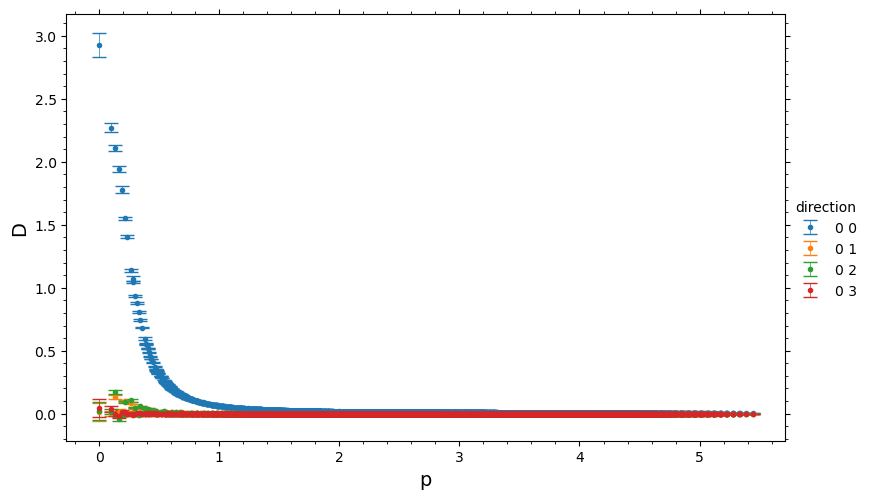

In [4]:
df = pd.read_csv('../../result/gluon_propagator/su2/gluodynamics/66^3x8/beta2.701/original/gluon_propagator.csv')
df = df[(df['a'] == 2) & (df['b'] == 2)]
df['momenta'] = np.sqrt(df['p1'] ** 2 + df['p2'] ** 2 + df['p3'] ** 2 + df['p4'] ** 2)
df['direction'] = df['mu'].astype(str) + " " + df['nu'].astype(str)
df = df[df['mu'] == 0]
print(df)
fg = seaborn.FacetGrid(data=df, hue = 'direction', height=5,
                           aspect=1.6, legend_out=True)
fg.map(plt.errorbar, 'momenta', 'Dr', 'Dr_err', mfc=None, fmt='o', ms=3, capsize=5, lw=0.5, ls=None
           ).add_legend()
fg.ax.set_xlabel('p', fontsize=14)
fg.ax.set_ylabel('D', fontsize=14)
fg.ax.spines['right'].set_visible(True)
fg.ax.spines['top'].set_visible(True)
fg.ax.minorticks_on()
fg.ax.tick_params(which='both', bottom=True,
                  top=True, left=True, right=True)

           p1        p2        p3  p4  mu        Dr    Dr_err  Di  Di_err  \
0    0.000000  0.000000  0.000000   0   0  0.496292  0.091510   0       0   
1    0.000000  0.000000  0.000000   0   1  0.557821  0.115407   0       0   
2    0.000000  0.000000  0.000000   0   2  0.366629  0.067455   0       0   
3    0.000000  0.000000  0.000000   0   3  0.441757  0.084497   0       0   
4    0.000000  0.000000  0.261799   0   0  0.545393  0.037606   0       0   
..        ...       ...       ...  ..  ..       ...       ...  ..     ...   
395  0.261799  0.261799  2.094395   0   3  0.515326  0.026469   0       0   
396  0.261799  0.261799  2.356194   0   0  0.492412  0.024067   0       0   
397  0.261799  0.261799  2.356194   0   1  0.526122  0.021058   0       0   
398  0.261799  0.261799  2.356194   0   2  0.466617  0.021620   0       0   
399  0.261799  0.261799  2.356194   0   3  0.481776  0.020391   0       0   

      momenta  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.0000

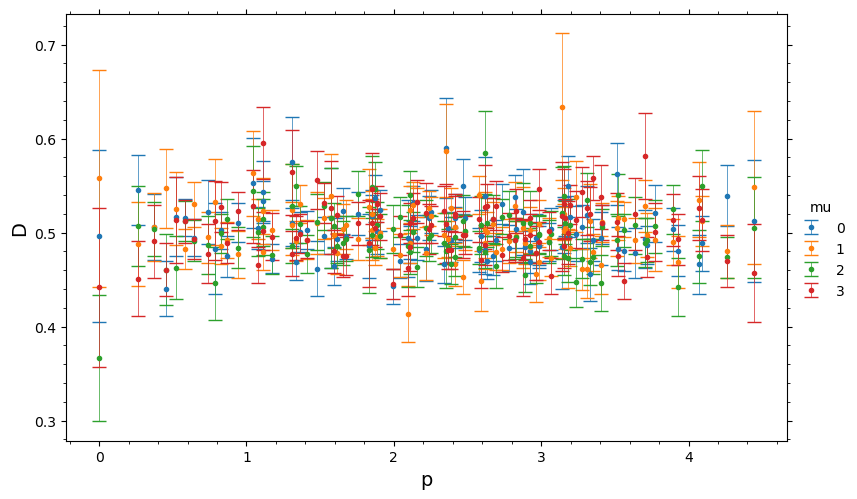

In [10]:
df = pd.read_csv('../../result/gluon_propagator/su2/su2_suzuki/24^4/beta2.4/abelian/T_step=0.0001/gluon_propagator.csv')
df['momenta'] = np.sqrt(df['p1'] ** 2 + df['p2'] ** 2 + df['p3'] ** 2 + df['p4'] ** 2)
print(df)
fg = seaborn.FacetGrid(data=df, hue = 'mu', height=5,
                           aspect=1.6, legend_out=True)
fg.map(plt.errorbar, 'momenta', 'Dr', 'Dr_err', mfc=None, fmt='o', ms=3, capsize=5, lw=0.5, ls=None
           ).add_legend()
fg.ax.set_xlabel('p', fontsize=14)
fg.ax.set_ylabel('D', fontsize=14)
fg.ax.spines['right'].set_visible(True)
fg.ax.spines['top'].set_visible(True)
fg.ax.minorticks_on()
fg.ax.tick_params(which='both', bottom=True,
                  top=True, left=True, right=True)